# Project 1

## Imports, etc.

In [1]:
from quantumsolver import fewnucleonEmulator
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Task 1

In [16]:
# Define the size of our mesh
NcD = 10 #256
NcE = 10 #256
k=3
cbar=1
Q=0.33

# Experimental data
my_E3H=-8.482
my_E4He=-28.296
my_Rp4He=1.4552
my_fT3H=1129.6

# Vectorized version of the fewnucleonEmulator
vfewnucleonEmulator = np.vectorize(fewnucleonEmulator)

In [17]:
# Create a 2-dimensional grid
# cD el [-2.5, 2.5]
# cE el [-1, 1]
cD = np.linspace(start=-2.5, stop=2.5, num=NcD)
cE = np.linspace(start=-1, stop=1, num=NcE)
cD_eval, cE_eval = np.meshgrid(cD,cE)
E4He_eval, Rp4He_eval, Rch4He_eval, E3He_eval, E3H_eval, E1A3H_eval, fT3H_eval = vfewnucleonEmulator(cD_eval, cE_eval)

In [18]:
# --- prior ---

def prior_multivariat(cD, cE):
    cD_eval, cE_eval = np.meshgrid(cD,cE)
    cDcE = np.stack((cD_eval, cE_eval), axis=-1)
    prior_dist = stats.multivariate_normal(mean=[0, 0], cov=[[25, 0], [0, 25]])
    prior = prior_dist.pdf(cDcE)
    return prior

def prior(cD, cE):
    prior_dist = stats.norm(0, 5)
    p1 = prior_dist.pdf(cD)
    p2 = prior_dist.pdf(cE)
    prior = np.outer(p2, p1)
    return prior

# --- likelihood ---

def likelihood(cD, cE, data, my, sigma):
    NcD = len(cD)
    NcE = len(cE)
    
    likelihood_dist = stats.norm(my, sigma)
    likelihood = likelihood_dist.pdf(data)
    return likelihood

# --- posterior ---

### TODO: Modify
def posterior(cD, cE, data, sigma):
    p=prior(cD, cE)*likelihood(cD, cE, data, sigma)
    norm=np.trapz(p,pH)
    return p/norm


### Estimate model discrepancy

- You can assume that each likelihood is given by a normal distribution
$$
p(y_{\mathrm{exp},i} | c_D, c_E, \sigma_i, I) = \mathcal{N} \left( y_{\mathrm{th},i}(c_D, c_E), \sigma_i \right).
$$
  I.e., the mean of the respective distribution is the model prediction $y_{\mathrm{th},i}(c_D, c_E)$ for that observable ($i$) for the given set of model parameters, while the standard deviation $\sigma_i$ reflects the combined experimental and theoretical uncertainties for that observable. This likelihood will be evaluated at the point corresponding to the observed, experimental value $y_{\mathrm{exp},i}$.
- To reproduce Fig. 6a you should use the adopted errors that are presented in Table I. They quantify the combination of experimental error and estimated precision of the many-body solver. That is, you should use $\sigma_i = \sigma_{\mathrm{exp+method},i}$
- To reproduce Fig. 6b you should add a model discrepancy term to your error model such that the total variance becomes $\sigma_i^2 = \sigma_{\mathrm{exp+method},i}^2 + \sigma_{\mathrm{EFT},i}^2$. In this case, the second term (known as a model discrepancy term) quantifies the uncertainty that comes from the truncation of the EFT expansion. Following the paper you can estimate this error with the formula
$$
\sigma_{\mathrm{EFT},i}^2 = \frac{ \left( y_{\mathrm{exp},i} \bar{c} Q^{k+1} \right)^2}{1 - Q^2},
$$
  where $k=3$ and you can fix $\bar{c}=1$ and the expansion parameter $Q=0.33$.

In [ ]:
disc2_E3H = np.power(yex*cbar*np.power(Q,k+1),2)/(1-Q**2)


### Estimate prior and likelihood

In [29]:
pPrior = prior(cD, cE)

pE3H_noefterr = likelihood(cD, cE, E3H_eval, my=my_E3H, sigma=sigma_E3H)
pE4He_noefterr = likelihood(cD, cE, E4He_eval, my=my_E4He, sigma=sigma_E4He)
pRp4He_noefterr = likelihood(cD, cE, Rp4He_eval, my=my_Rp4He, sigma=sigma_Rp4He)
pfT3H_noefterr = likelihood(cD, cE, fT3H_eval, my=my_fT3H, sigma=sigma_fT3H)

pE3H_efterr = likelihood(cD, cE, E3H_eval, my=my_E3H, sigma=sigma_E3H)
pE4He_efterr = likelihood(cD, cE, E4He_eval, my=my_E4He, sigma=sigma_E4He)
pRp4He_efterr = likelihood(cD, cE, Rp4He_eval, my=my_Rp4He, sigma=sigma_Rp4He)
pfT3H_efterr = likelihood(cD, cE, fT3H_eval, my=my_fT3H, sigma=sigma_fT3H)


### Find a confidence interval

In [30]:
def ci(dist): 
    return None

### Reproduce plot 6a

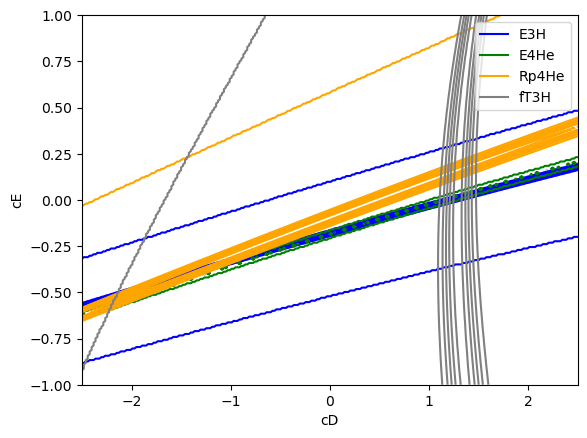

In [15]:
 # 6a)

# E4He_eval: blue
# E3H_eval: green
# Rp4He_eval: orange
# fT3H_eval: grey

import matplotlib.lines as mlines

plt.contour(cD_eval, cE_eval, pE3H_noefterr*pPrior, colors="blue")
plt.contour(cD_eval, cE_eval, pE4He_noefterr*pPrior, colors="green")
plt.contour(cD_eval, cE_eval, pRp4He_noefterr*pPrior, colors="orange")
plt.contour(cD_eval, cE_eval, pfT3H_noefterr*pPrior, colors="grey")

legend_labels = [
    mlines.Line2D([], [], color='blue', label='E3H'),
    mlines.Line2D([], [], color='green', label='E4He'),
    mlines.Line2D([], [], color='orange', label='Rp4He'),
    mlines.Line2D([], [], color='grey', label='fT3H')
]
plt.legend(handles=legend_labels)

plt.xlabel('cD')
plt.ylabel('cE')

# Show the plot
plt.show()

In [ ]:
 # 6b)

# E4He_eval: blue
# E3H_eval: green
# Rp4He_eval: orange
# fT3H_eval: grey

import matplotlib.lines as mlines

plt.contour(cD_eval, cE_eval, pE3H*pPrior, colors="blue")
plt.contour(cD_eval, cE_eval, pE4He*pPrior, colors="green")
plt.contour(cD_eval, cE_eval, pRp4He*pPrior, colors="orange")
plt.contour(cD_eval, cE_eval, pfT3H*pPrior, colors="grey")

legend_labels = [
    mlines.Line2D([], [], color='blue', label='E3H'),
    mlines.Line2D([], [], color='green', label='E4He'),
    mlines.Line2D([], [], color='orange', label='Rp4He'),
    mlines.Line2D([], [], color='grey', label='fT3H')
]
plt.legend(handles=legend_labels)

plt.xlabel('cD')
plt.ylabel('cE')

# Show the plot
plt.show()

---

- How dense grid can you use given that each model evaluation takes $\lesssim 1$ ms and you would probably not like to wait more than $\sim$ minutes?

In [327]:
# Assume 1 minute => 60 seconds => 60,000 ms ~ 2^16 => 256x256 dimension

- There might be useful utility code in Problem Set 2 for extracting contour levels for a PDF that is evaluated on a grid.

- How many data points would you naively need to infer two model parameters? If you were to combine the data that you have available, which set do you think works best for this inference problem?

## Task 2

## Task 3